In [1]:
from __future__ import unicode_literals

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import re
import requests
import os, os.path
from whoosh import index
from whoosh.qparser import QueryParser

import os, os.path
from whoosh import index
from jieba.analyse import ChineseAnalyzer

import pdfplumber
import whoosh.index as index

# ix = index.open_dir("indexdir")


from whoosh.fields import Schema, STORED, ID, KEYWORD, TEXT
from  PIL import Image
import random          #导入 random(随机数) 模块
import pytesseract     #导入识别验证码信息包
import time

In [5]:
def jietu_xieru(driver,_save_url,yuansu,yanzhma_text):
    # 截图当前屏幕，并裁剪出验证码保存为:_file_name副本.png，并返回名称
    yanzhengma_file_name = image_cj(driver,_save_url, yuansu)  ##对页面进行截图，弹出框宽高（因为是固定大小，暂时直接写死了）
    # 获得验证码图片中的内容
    text = image_text(_save_url, yanzhengma_file_name)
    # 写入验证码
    driver.find_element_by_id('verfieldUserText').send_keys(text)
    time.sleep(2)
def image_cj(driver,_save_url,yuansu):
    try:
        _file_name = random.randint(0, 100000)
        _file_name_wz = str(_file_name) + '.png'
        _file_url = _save_url + _file_name_wz
        driver.get_screenshot_as_file(_file_url)  # get_screenshot_as_file截屏
        captchaElem = driver.find_element_by_id(yuansu)  # # 获取指定元素（验证码）
        # 因为验证码在没有缩放，直接取验证码图片的绝对坐标;这个坐标是相对于它所属的div的，而不是整个可视区域
        # location_once_scrolled_into_view 拿到的是相对于可视区域的坐标  ;  location 拿到的是相对整个html页面的坐标
        captchaX = int(captchaElem.location['x'])
        captchaY = int(captchaElem.location['y'])
        # 获取验证码宽高
        captchaWidth = captchaElem.size['width']
        captchaHeight = captchaElem.size['height']

        captchaRight = captchaX + captchaWidth
        captchaBottom = captchaY + captchaHeight

        imgObject = Image.open(_file_url)  #获得截屏的图片
        imgCaptcha = imgObject.crop((captchaX, captchaY, captchaRight, captchaBottom))  # 裁剪
        yanzhengma_file_name = str(_file_name) + '副本.png'
        imgCaptcha.save(_save_url + yanzhengma_file_name)
        return  yanzhengma_file_name
    except Exception as e:
        print('错误 ：', e)



# 获取验证码图片中信息（保存地址，要识别的图片名称）
def image_text(_save_url,yanzhengma_file_name):
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'
    yanzhengma_file_url = 'F:\\Python\\workspace\\selenium_demo3_test\\test\\case\\PT\\'+ _save_url
    image = Image.open(yanzhengma_file_url + yanzhengma_file_name)
    text = pytesseract.image_to_string(image)
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$图片中的内容为：', text)
    return text
def initialize():
    options = Options()
    options.add_argument("--headless")  # 无界面
    driver = webdriver.Chrome(options=options)   
    return driver

In [50]:
driver = initialize()
driver.get("http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=50")



In [51]:
driver.current_url

'http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=50'

In [52]:
driver.get_screenshot_as_file("test.png")
captchaElem = driver.find_element_by_id("yzmImg")

captchaX = int(captchaElem.location['x'])
captchaY = int(captchaElem.location['y'])
# 获取验证码宽高
captchaWidth = captchaElem.size['width']
captchaHeight = captchaElem.size['height']

captchaRight = captchaX + captchaWidth
captchaBottom = captchaY + captchaHeight

imgObject = Image.open('test.png')  #获得截屏的图片
imgCaptcha = imgObject.crop((captchaX, captchaY, captchaRight, captchaBottom)) 

yanzhengma_file_name = 'test_yzm'+'.png'
imgCaptcha.save(yanzhengma_file_name)

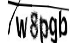

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$图片中的内容为： 
输入验证码：w8pgb
981 付长伍 居民身份证 1326231967****1033 失信被执行人 (2018)京0102执4697号 北京市西城区人民法院 2018-4-2


In [79]:
url = "http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=50"
driver.get(url)
try:
    print(driver.find_element_by_class_name("table_list_02").find_elements_by_tag_name("tr")[1].text)
except:
    driver.get_screenshot_as_file("test.png")
    captchaElem = driver.find_element_by_id("yzmImg")

    captchaX = int(captchaElem.location['x'])
    captchaY = int(captchaElem.location['y'])
    # 获取验证码宽高
    captchaWidth = captchaElem.size['width']
    captchaHeight = captchaElem.size['height']

    captchaRight = captchaX + captchaWidth
    captchaBottom = captchaY + captchaHeight

    imgObject = Image.open('test.png')  #获得截屏的图片
    imgCaptcha = imgObject.crop((captchaX, captchaY, captchaRight, captchaBottom)) 

    yanzhengma_file_name = 'test_yzm'+'.png'
    imgCaptcha.save(yanzhengma_file_name)
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
    yanzhengma_file_url = 'test_yzm.png'
    image = Image.open(yanzhengma_file_url)
    text = pytesseract.image_to_string(image)
    display(image)
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$图片中的内容为：', text)
    yzm_text = input("输入验证码：")
    driver.find_element_by_id("yzmInput").send_keys(yzm_text)
    driver.find_element_by_id("loginBtn").click()
    time.sleep(1)
    print(driver.find_element_by_class_name("table_list_02").find_elements_by_tag_name("tr")[1].text)

In [69]:

driver.find_element_by_id("yzmInput").get_attribute("value")


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="yzmInput"]"}
  (Session info: headless chrome=84.0.4147.89)


In [72]:
driver.find_element_by_class_name("table_list_02").find_elements_by_tag_name("tr")[1].text

'981 付长伍 居民身份证 1326231967****1033 失信被执行人 (2018)京0102执4697号 北京市西城区人民法院 2018-4-2'

In [32]:

print(pytesserocr.file_to_text('image.png'))


NameError: name 'pytesserocr' is not defined

In [16]:



def make_df(url_list):
    empty_list = []
    for url in url_list:
        time.sleep(1)
        print(url)
        new_list = get_content(url)
        empty_list.extend(new_list)
    df = pd.DataFrame(empty_list,columns=["company_name","company_id","case_id","district","date"])
    return df

def get_content(url):
    res = requests.get(url)

    

    soup = BeautifulSoup(res.text,features='lxml')
    table = soup.find_all('table',{'class':re.compile('table_list_02')})
    
    content = []
    
    tr = table[0].find_all("tr")
    if tr==None:
        print("Error")
    for i in tr[1:]:
        tds = i.find_all("td")
        org_type = tds[2].text
        if org_type == "居民身份证":
            continue
        
        company_name = i.find("a")["title"]
        company_id = tds[3].text
        case_id = tds[5].text
        district = tds[6].text
        date = tds[7].text
        content.append([company_name,company_id,case_id,district,date])
    return content

    

In [20]:
if __name__ == '__main__':
    url="http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page="
    urls = [url+str(i) for i in range(1,10691)]
    start_page = input("Enter starting page to scrape(minimum = 1):  ")
    end_page=input("Enter ending page to scrape(max 10690):    ")
    
    save_file = input("Save as a csv file?(Y/N):   ")
    file_path = input("File name? Don't include .csv:   ")
    
        
        
    df = make_df(urls[int(start_page)-1:int(end_page)])
    display(df)
    if save_file == "Y":
        df.to_csv(file_path+".csv")
    

Enter starting page to scrape(minimum = 1):  1
Enter ending page to scrape(max 10690):    10
Save as a csv file?(Y/N):   Y
File name? Don't include .csv:   beijing
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=1
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=2
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=3
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=4
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=5
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=6
http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jb

,company_name,company_id,case_id,district,date
0,祝好（北京）科技有限公司,MA00EF78-4,(2018)京0108执12745号,北京市海淀区人民法院,2018-8-2
1,盛世汉桥（北京）教育科技有限公司,30657990-8,(2018)京0108执9381号,北京市海淀区人民法院,2018-5-30
2,北京乐编互联科技有限公司,33031888-X,(2018)京0107执12085号,北京市石景山区人民法院,2018-9-14
3,北京唐密科技发展有限公司,05925398-5,(2018)京0108执15820号,北京市海淀区人民法院,2018-10-11
4,健龙时代（北京）健康科技发展有限公司,69166463-0,(2018)京0108执12399号,北京市海淀区人民法院,2018-7-25
5,太仆寺旗东驿热力有限责任公司,55284810-6,(2018)京0108执12402号,北京市海淀区人民法院,2018-7-25
6,北京唐桓科技发展有限公司,66051002-2,(2018)京0108执15820号,北京市海淀区人民法院,2018-10-11
7,北京唐密科技发展有限公司,05925398-5,(2018)京0108执15819号,北京市海淀区人民法院,2018-10-11
8,北京骏勋科技有限公司,07168955-4,(2018)京0108执12401号,北京市海淀区人民法院,2018-7-25
9,北京南国帝人装饰设计有限公司,80206512-1,(2018)京0108执恢916号,北京市海淀区人民法院,2018-7-25


In [19]:
reload(sys)
sys.setdefaultencoding('utf8')  
 
headers=("User-Agent",
"Mozilla/5.0 (X11; Ubuntu; Linu…) Gecko/20100101 Firefox/60.0")
opener=urllib2.build_opener()
opener.addheaders=[headers]
urllib2.install_opener(opener)

res = requests.get("http://www.bjcourt.gov.cn/zxxx/indexOld.htm?st=1&zxxxlx=100013001&bzxrlx=&bzxrxm=&zrr=&frhqtzz=&jbfyId=&ah=&dqxh=14&page=11")
url="http://shixin.court.gov.cn/captchaNew.do?captchaId=6eb54a8c64f84a84b6490db24671c310&random="+str(i)
    data=urllib2.urlopen(url).read()
    #data=urllib2.quote(data).decode('utf-8')
    file="/yzmimgs/"+str(i)+".png"
    playFile = open(file, 'wb')
    playFile.write(data)
    playFile.close()
    time.sleep(1)


<html><head><link href="/pub/blueskin/css/reset.css;jsessionid=58388F783178ADD6395A58F9AA807816" media="all" rel="stylesheet" type="text/css"/>
<link href="/pub/blueskin/css/global.css;jsessionid=58388F783178ADD6395A58F9AA807816" media="all" rel="stylesheet" type="text/css"/>
<link href="/pub/blueskin/css/common.css;jsessionid=58388F783178ADD6395A58F9AA807816" media="all" rel="stylesheet" type="text/css"/>
<link href="/pub/blueskin/css/mainnav.css;jsessionid=58388F783178ADD6395A58F9AA807816" media="all" rel="stylesheet" type="text/css"/>
<link href="/pub/blueskin/css/QRCode.css;jsessionid=58388F783178ADD6395A58F9AA807816" rel="stylesheet" type="text/css"/>
<link href="/jq/jquery-ui/jquery-ui-1.9.2.custom.css;jsessionid=58388F783178ADD6395A58F9AA807816" rel="stylesheet" type="text/css"/>
<link href="/pub/blueskin/css/ui_date_plugin.css;jsessionid=58388F783178ADD6395A58F9AA807816" rel="stylesheet" type="text/css"/>
<script type="text/javascript">
    var contextPath = "";
</script>
<scri

In [27]:

from selenium import webdriver
from PIL import Image
def part_screenshot(driver):
    driver.save_screenshot("hello1.png")
    return Image.open("hello1.png")


def get_image(driver):  # 对验证码所在位置进行定位，然后截取验证码图片
    img = driver.find_element_by_xpath('//*[@id="u1"]/a[2]')
    time.sleep(2)
    location = img.location
    print(location, 111)
    size = img.size
    left = location['x']
    top = location['y']
    right = left + size['width']
    bottom = top + size['height']
    page_snap_obj = part_screenshot(driver)
    image_obj = page_snap_obj.crop((left, top, right, bottom))
    return image_obj  # 得到的就是验证码


if __name__ == '__main__':
    driver = webdriver.Chrome()
    driver.get("https://www.baidu.com")
    print(driver.title)  # 打印页面的标题
    b = get_image(driver)
    b.save("1.png")
    print(b)
    driver.quit()  # 一定要退出！不退出会有残留进程！

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [5]:
from ftplib import FTP 
import cx_Oracle as oracle
import pandas as pd


def query_to_csv(query):
    
    query = "select * from most_viewed_sample m inner join user_profile u on m.userid = u.userid"
    try:
        cursor = db.cursor()
        cursor.execute(query)
        data = cursor.fetchall()
        SqlDomain = cursor.description
        DomainNum = len(SqlDomain)
        SqlDomainName = [None]*DomainNum
        for i in range(DomainNum):
            SqlDomainName[i] = SqlDomain[i][0]
    #获取表头
    
        df = pd.DataFrame(data)
        df.columns = SqlDomainName
    
    
    
        display(df)
        file_name = input("保存csv为（不用csv后缀,如果不保存）：   ")
        if file_name !="No":
            df.to_csv(file_name+".csv")
            print("Successfully Saved to CSV in path: "+file_name+".csv")
        cursor.close()
        print("Finished")
        return file_name+".csv"
    
    except:
        print("Query failed")
def upload_ftp(ip,port,username,password,filename):
    ftp = FTP()
# 打开调试级别2, 显示详细信息 
    ftp.set_debuglevel(2) # 
    try:
        ftp.connect(ip,int(port))
        ftp.login(username,password)
    except:
        ftp.connect("127.0.0.1",2121)
        ftp.login("alex", "123")
          
     
    ftp.cwd("drop_files") #ftp location下的目录，里面用于存放文件
    # 切换目录, 相对于ftp目录, 比如设置的ftp根目录为/vat/ftp, 那么pub就是/var/ftp下面的目录 
    
    f = open(filename, 'rb') # 打开csv文件夹
    ftp.storbinary("STOR {}".format(filename), f,1024) 
    f.close() # 关闭调试模式 
    ftp.set_debuglevel(0) # 退出FTP连接 
    ftp.quit()
    print("Successfully upload")
    print("Quitting FTP upload")
    
if __name__ == '__main__':
    username = input("Database Username(必须大写）:   ")
    password = input("Database Password:   ")
    database_ip = input("数据库IP(默认127.0.0.1):   ")
    port = input("Port(默认1521):    ")
    database = input("服务名/数据库(默认orcl):    ")
    string = username+"/"+password+"@"+database_ip+":"+"port"+"/"+database
    try:
        db = oracle.connet(string)
    except:
        db = oracle.connect('tenant01/123456@127.0.0.1:1521/orcl')
    print("successfully_connected")
    query = input("Enter SQL Query:    ")
    filename  = query_to_csv(query)
    ipconfig = input("FTP IP address(default 127.0.0.1):   ")
    port = input("Port number(default 2121):   ")
    username = input("FTP Username: (default alex):   ")
    password = input("FTP Password: (default 123):   ")
    upload_ftp(ipconfig,port,username,password,filename)
    

    
    



Database Username(必须大写）:   
Database Password:   
数据库IP(默认127.0.0.1):   
Port(默认1521):    
服务名/数据库(默认orcl):    
successfully_connected
Enter SQL Query:    


,USERID,TIME_STAMP,ADGROUP_ID,PID,NONCLK,CLK,USERID,CMS_SEGID,CMS_GROUP_ID,FINAL_GENDER_CODE,AGE_LEVEL,PVALUE_LEVEL,SHOPPING_LEVEL,OCCUPATION,NEW_USER_CLASS_LEVEL
0,199245,1494402160,736349,430548_1007,1,0,199245,66,9,1,3,2.0,3,0,2.0
1,31399,1494119672,736349,430539_1007,1,0,31399,0,11,1,5,1.0,3,0,NaN
2,603750,1494571635,736349,430548_1007,1,0,603750,0,3,2,3,NaN,3,0,2.0
3,184484,1494647015,736349,430539_1007,1,0,184484,80,10,1,4,2.0,3,0,2.0
4,225798,1494552166,736349,430548_1007,1,0,225798,0,4,2,4,NaN,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24361,538612,1494049237,736349,430539_1007,1,0,538612,0,3,2,3,NaN,3,0,4.0
24362,44759,1494506356,736349,430548_1007,1,0,44759,0,1,2,1,NaN,1,0,NaN
24363,424172,1494555535,736349,430539_1007,1,0,424172,0,2,2,2,2.0,3,0,NaN
24364,105869,1494633421,736349,430548_1007,1,0,105869,8,2,2,2,1.0,3,0,3.0


保存csv为（不用csv后缀,如果不保存请填No）：   test
Successfully Saved to CSV in path: test.csv
Finished
FTP IP address(default 127.0.0.1):   
Port number(default 2121):   
FTP Username: (default alex):   
FTP Password: (default 123):   
*get* '220 Welcome to my ftp\n'
*resp* '220 Welcome to my ftp'
*cmd* 'USER alex'
*put* 'USER alex\r\n'
*get* '331 Username ok, send password.\n'
*resp* '331 Username ok, send password.'
*cmd* 'PASS ***'
*put* 'PASS ***\r\n'
*get* '230 Login successful.\n'
*resp* '230 Login successful.'
*cmd* 'CWD drop_files'
*put* 'CWD drop_files\r\n'
*get* '250 "/drop_files" is the current directory.\n'
*resp* '250 "/drop_files" is the current directory.'
*cmd* 'TYPE I'
*put* 'TYPE I\r\n'
*get* '200 Type set to: Binary.\n'
*resp* '200 Type set to: Binary.'
*cmd* 'PASV'
*put* 'PASV\r\n'
*get* '227 Entering passive mode (127,0,0,1,33,46).\n'
*resp* '227 Entering passive mode (127,0,0,1,33,46).'
*cmd* 'STOR test.csv'
*put* 'STOR test.csv\r\n'
*get* '125 Data connection already open. Trans

In [30]:
ftp.nlst()

['$RECYCLE.BIN',
 '2345Downloads',
 '360Downloads',
 'BaiduNetdiskDownload',
 'Boot',
 'EFI',
 'RP.ini',
 'Recovery',
 'System Volume Information',
 'bootmgr',
 'bootmgr.efi',
 'mycode',
 'preload',
 'sources']

In [31]:
ftp.quit()

ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。